# Dimension Interpretability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec
from gensim.models import FastText
from gensim.models import KeyedVectors
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
keyed_vector = {}
# word2vec_model = word2vec.Word2Vec.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/word2vec_model3/word2vec.model')
word2vec_model = word2vec.Word2Vec.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/word2vec_model8/word2vec_300.w2v')
keyed_vector['word2vec'] = word2vec_model.wv
# fasttext_model = FastText.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/fasttext_model3/fasttext.model')
# keyed_vector['fasttext'] = fasttext_model.wv

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
print(list(keyed_vector['word2vec'].vocab.keys())[1])

අංග


In [ ]:
fo = open('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model8 - Crosslingual/word2vec_300.w2v.wv.vectors.npy', 'rb')
lines = fo.readlines()
print(lines[0])
fo.close()

b"\x93NUMPY\x01\x00v\x00{'descr': '<f4', 'fortran_order': False, 'shape': (2137729, 300), }                                                  \n"


In [ ]:
spreadsheet = gc.open('Sentiment Tagged Words')
worksheet = spreadsheet.worksheet('Manually Tagged Words')
words = worksheet.col_values(1)
scores = worksheet.col_values(2)

In [1]:
positive_words = []
negative_words = []

for i in range(1, len(words)):
  if int(scores[i]) > 0:
    positive_words.append(words[i])
  else:
    negative_words.append(words[i])

# plt.figure(figsize=(100,5), dpi=72)

x = np.arange(1,301)
y_p = np.zeros((1,300), dtype='float32')
for word in positive_words:
  vector = np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32')
  y_p += vector
y_p = y_p / (len(positive_words))
plt.plot(x, y_p.T, 'b', label='positive')

y_n = np.zeros((1,300), dtype='float32')
for word in negative_words:
  vector = np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32')
  y_n += vector
y_n = y_n / (len(negative_words))
plt.plot(x, y_n.T, 'r', label='negative')

plt.xticks(x, rotation='vertical')
plt.legend()
plt.show()

NameError: ignored

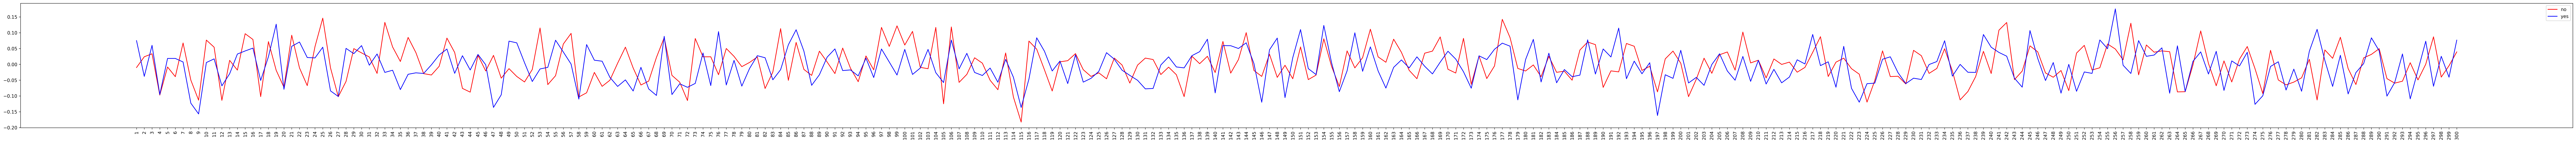

In [ ]:
plt.figure(figsize=(100,5), dpi=300)
x = np.arange(1,301)
y = np.array(keyed_vector['word2vec'].word_vec('නැහැ'), dtype='float32')
plt.plot(x, y.T, 'r', label='no')
y = np.array(keyed_vector['word2vec'].word_vec('ඔව්'), dtype='float32')
plt.plot(x, y.T, 'b', label='yes')
plt.xticks(x, rotation='vertical')
plt.legend()
plt.show()

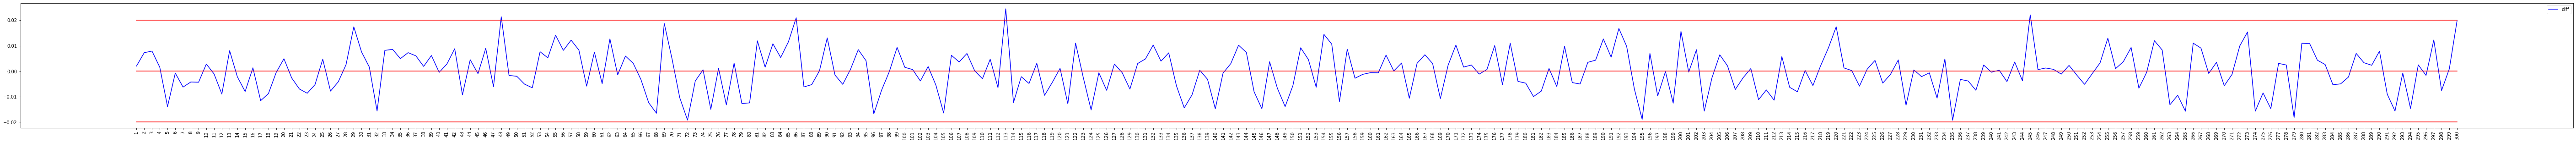

In [ ]:
plt.figure(figsize=(100,5), dpi=72)
y_d = y_p - y_n
plt.plot(x, y_d.T, 'b', label='diff')
k = np.ones(300)
plt.plot(x, k * 0, 'r')
plt.plot(x, k * 0.02, 'r')
plt.plot(x, k * (-0.02), 'r')
plt.xticks(x, rotation='vertical')
plt.legend()
plt.show()

In [ ]:
g = []
y_d = y_d.T
for i in range(len(y_d)):
  if (y_d[i] > 0.015) or (y_d[i] < -0.015):
    g.append(i)
print(g)

[28, 31, 47, 67, 68, 71, 74, 85, 95, 104, 112, 123, 191, 194, 199, 202, 219, 234, 244, 264, 272, 273, 278, 291, 299]


In [ ]:
len(g)

25

In [ ]:
print(y_d.T) 
wji c jia; c jc ijt kd cit ialc jao

# Semantic Structure and Interpretability of Word Embeddings

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth
from gensim.models import word2vec
from gensim.models import FastText
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

spreadsheet = gc.open('Sentiment Tagged Words')
worksheet = spreadsheet.worksheet('SENTIMENT LEXICON')
col_1 = worksheet.col_values(1)
col_2 = worksheet.col_values(2)
col_3 = worksheet.col_values(3)
words = []
words.append(col_1[1:])
words.append(col_2[1:])
words.append(col_3[1:])

In [ ]:
keyed_vector = {}
word2vec_model = word2vec.Word2Vec.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/word2vec_model3/word2vec.model')
keyed_vector['word2vec'] = word2vec_model.wv
word2vec_model = word2vec.Word2Vec.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/fasttext_model3/fasttext.model')
keyed_vector['fasttext'] = word2vec_model.wv

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
def p(i, j):
  vec = []
  for word in words[j]:
    word_vector = np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32')
    vec.append(word_vector[i])
  vec = np.array(vec)
  return vec

def q(i, j):
  vec = []
  for category in range(3):
    if category != j:
      for word in words[j]:
        word_vector = np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32')
        vec.append(word_vector[i])
  vec = np.array(vec)
  return vec

def mean_p(i, j):
  return np.mean(p(i, j))

def mean_q(i, j):
  return np.mean(q(i, j))

def sd_p(i, j):
  return np.std(p(i, j))

def sd_q(i, j):
  return np.std(q(i, j))

def w_b(i, j):
  return 0.25 * np.log(0.25 * (sd_p(i, j)**2 / sd_q(i, j)**2 + sd_q(i, j)**2 / sd_p(i, j)**2 + 2)) + 0.25 * ((mean_p(i, j) - mean_q(i, j))**2 / (sd_p(i, j)**2 + sd_q(i, j)**2))

def w_sb(i, j):
  val = 0.25 * np.log(0.25 * (sd_p(i, j)**2 / sd_q(i, j)**2 + sd_q(i, j)**2 / sd_p(i, j)**2 + 2)) + 0.25 * ((mean_p(i, j) - mean_q(i, j))**2 / (sd_p(i, j)**2 + sd_q(i, j)**2))
  if (mean_p(i, j) - mean_q(i, j)) >= 0:
    return val
  else:
    return -1 * val

def w_c(i, j):
  return mean_p(i, j)

W_B = []
W_SB = []
W_C = []
for i in range(300):
  row_b = []
  row_sb = []
  row_c = []
  for j in range(3):
    row_b.append(w_b(i, j))
    row_sb.append(w_sb(i, j))
    row_c.append(w_c(i, j))
  W_B.append(row_b)
  W_SB.append(row_sb)
  W_C.append(row_c)

W_NB = normalize(W_B, norm='l1', axis=0)
W_NSB = normalize(W_SB, norm='l1', axis=0)

epsilon = []
flatten_words = words[0] + words[1] + words[2]
for word in flatten_words:
  epsilon.append(np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32'))
epsilon = np.array(epsilon)
epsilon_s = (epsilon - np.mean(epsilon)) / np.std(epsilon)

def I():
  return np.matmul(epsilon_s, W_NSB)

def I_star():
  return np.matmul(epsilon, W_C)

In [ ]:
#@title
#@W_B
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_B).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_B).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_B).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
# plt.xticks(x, rotation='vertical')
plt.title('W_B')
plt.legend()
plt.show()

In [ ]:
#@title
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_SB).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_SB).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_SB).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
# plt.xticks(x, rotation='vertical')
plt.title('W_SB')
plt.legend()
plt.show()

In [ ]:
#@title
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_NB).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_NB).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_NB).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
# plt.xticks(x, rotation='vertical')
plt.title('W_NB')
plt.legend()
plt.show()

In [ ]:
#@title
plt.figure(figsize=(30,5), dpi=300)
x = list(range(1, 301))
y1 = np.array(W_NSB).T[0]
plt.plot(x, y1.T, 'b', label='Dimensional decomposition of positive words')
y2 = np.array(W_NSB).T[1]
plt.plot(x, y2.T, 'r', label='Dimensional decomposition of negative words')
y3 = np.array(W_NSB).T[2]
plt.plot(x, y3.T, 'g', label='Dimensional decomposition of objective words')
plt.xticks(x, rotation='vertical')
plt.title('W_NSB')
plt.legend()
plt.show()

In [ ]:
y1 = np.array(W_NSB).T[0]
y2 = np.array(W_NSB).T[1]
y3 = np.array(W_NSB).T[2]
for i in range(300):
  if y3[i] < -0.02:
    print(i)

In [ ]:
a = np.array(keyed_vector['word2vec'].word_vec('කීකරු'), dtype='float32').reshape((1,300))
b = np.array(W_NB)
x = np.dot(a, b)
a = np.array(keyed_vector['word2vec'].word_vec('නරක'), dtype='float32').reshape((1,300))
b = np.array(W_NB)
y = np.dot(a, b)
from numpy import dot
from numpy.linalg import norm
cos_sim = dot(x, y.T)/(norm(x)*norm(y))
cos_sim

In [ ]:
plt.figure(figsize=(15,5), dpi=300)
x = list(range(1, 4))
y = I()[500]
plt.plot(x, y, 'b', label='y')
# plt.title('W_NSB')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(5,5), dpi=72)
x = list(range(1, 4))
y = abs(I()[0])
plt.bar(x, y, label='y')
# plt.title('W_NSB')
plt.xticks(x, ['pos', 'neg', 'obj'])
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(5,5), dpi=72)
x = list(range(1, 4))
y = abs(I()[1])
plt.bar(x, y, label='y')
# plt.title('W_NSB')
plt.xticks(x, ['pos', 'neg', 'obj'])
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(5,5), dpi=72)
x = list(range(1, 4))
y = abs(I()[900])
plt.bar(x, y, label='y')
# plt.title('W_NSB')
plt.xticks(x, ['pos', 'neg', 'obj'])
plt.legend()
plt.show()

In [ ]:
I()[0]

array([ 0.01846839, -0.26895636,  0.10574212])

In [ ]:
p_p = []
p_n = []
n_p = []
n_n = []

i = 0
for word in words[0]:
  word_vector = np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32').reshape((1,300))
  weight = np.array(W_NSB)
  x = np.dot(word_vector, weight)
  p_p.append(x[0][0])
  p_n.append(x[0][1])
  # x = I_star()[i]
  # i += 1
  # p_p.append(x[0])
  # p_n.append(x[1])

for word in words[1]:
  word_vector = np.array(keyed_vector['word2vec'].word_vec(word), dtype='float32').reshape((1,300))
  weight = np.array(W_NSB)
  x = np.dot(word_vector, weight)
  n_p.append(x[0][0])
  n_n.append(x[0][1])
  # x = I_star()[i]
  # i += 1
  # n_p.append(x[0])
  # n_n.append(x[1])

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(p_n, p_p, color='b')
plt.scatter(n_n, n_p, color='r')
# plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'k')
plt.xlabel('negative')
plt.ylabel('positive')
plt.show()

In [ ]:
x = np.array(W_NSB)
x = x.T
dims = []
for i in range(3):
  for j in range(300):
    if x[i][j] > 0.25*10**(-5) or x[i][j] < -0.25*10**(-5):
      if j not in 

# Using W_NSB with new model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import word2vec
from gensim.models import FastText
from gensim.models import KeyedVectors
from tabulate import tabulate
from sklearn import metrics
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%%capture
################################################################################
# loading word embeddings
################################################################################

keyed_vector = {}
word2vec_model = word2vec.Word2Vec.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/word2vec_model3/word2vec.model')
keyed_vector['word2vec'] = word2vec_model.wv
fasttext_model = FastText.load('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model1 - Word Embeddings/fasttext_model3/fasttext.model')
keyed_vector['fasttext'] = fasttext_model.wv

In [ ]:
################################################################################
# loading pos tags
################################################################################

pos_tagged_words_df = pd.read_csv('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model2 - Datasets/lankadeepa_pos_tagged_words.csv', header=0)
rows = pos_tagged_words_df.to_dict('split')['data']
pos_tags = {}
for row in rows:
  pos_tags[row[0]] = row[1]

In [ ]:
################################################################################
# initializing lexicon
################################################################################

spreadsheet = gc.open('Sentiment Tagged Words')
worksheet = spreadsheet.worksheet('seed_set_1')
rows = worksheet.get_all_values()

In [ ]:
spreadsheet = gc.open('Sentiment Tagged Words')
worksheet = spreadsheet.worksheet('Manually Tagged Words')
words = worksheet.col_values(1)
fo = open('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Model2 - Datasets/3dim_vec.txt', 'w')
for word in words[1:]:
  vec_300 = keyed_vector['word2vec'].word_vec(word).reshape((1,300))
  vec_3 = np.dot(vec_300, W_NSB)
  fo.write(word + " " + str(vec_3[0][0]) +  " " + str(vec_3[0][1]) + " " + str(vec_3[0][2]) + "\n")
fo.close()

In [ ]:
################################################################################
# expanding lexicon
################################################################################
lexicon = {}
queue = []
for row in rows[1:]:
  word, score = row
  score = int(score)
  pos = score if score > 0 else 0
  neg = score if score < 0 else 0
  lexicon[word] = {'pos': pos, 'neg': neg}
  queue.append(word)

LEXICON_NAME = 'lexicon023'
LEXICON_SIZE = 10000
BRANCH_FACTOR = 8
BRANCH_THRESHOLD = 0
SIM_FACTOR = 8
SIM_THRESHOLD = 0
i = 0
while i < len(queue):
  word = queue[i]
  vec1_300 = keyed_vector['word2vec'].word_vec(word).reshape((1,300))
  vec1_3 = np.dot(vec1_300, W_NSB)
  # for j in [28, 29, 42, 54, 70, 71, 80, 87, 114, 128, 152, 155, 194, 196, 204, 216, 233, 249, 254, 257, 266, 281, 289, 293, 296, 299]:
  #   vec1_25.append(vec1_300[j])
  similar_words = {}
  for similar_word, similarity in keyed_vector['word2vec'].most_similar(word, topn=BRANCH_FACTOR):
    # filter by branch_threshold
    if similarity < BRANCH_THRESHOLD:
      continue
    pos_tag = pos_tags.get(similar_word, 'None')
    vec2_300 = keyed_vector['word2vec'].word_vec(similar_word).reshape((1,300))
    vec2_3 = np.dot(vec2_300, W_NSB)
    # for j in [28, 29, 42, 54, 70, 71, 80, 87, 114, 128, 152, 155, 194, 196, 204, 216, 233, 249, 254, 257, 266, 281, 289, 293, 296, 299]:
    #   vec2_25.append(vec2_300[j])
    similarity_25 = np.dot(vec1_3, vec2_3.T) / (np.linalg.norm(vec1_3) * np.linalg.norm(vec2_3))
    similar_words[similar_word] = {'similarity': similarity, 'pos_tag': pos_tag, 'similarity_25': similarity_25}

  top_similarity_25_values = [similar_words[similar_word]['similarity_25'] for similar_word in similar_words.keys()]
  top_similarity_25_values.sort(reverse=True)
  top_similarity_25_values = top_similarity_25_values[:SIM_FACTOR]

  for similar_word in similar_words.keys():
    similarity = similar_words[similar_word]['similarity']
    pos_tag = similar_words[similar_word]['pos_tag']
    similarity_25 = similar_words[similar_word]['similarity_25']
    # filter by sim_factor
    if similarity_25 not in top_similarity_25_values:
      continue
    # filter by sim_threshold
    if similarity_25 < SIM_THRESHOLD:
      continue
    # filter by pos tag
    if pos_tag in ['JJ', 'JCV', 'NIP', 'AUX', 'RB']:
      is_existing = lexicon.get(similar_word, 'False')
      if is_existing != 'False':
        if abs(lexicon[word]['pos']) > abs(lexicon[word]['neg']):
          lexicon[similar_word]['pos'] += 1
        elif abs(lexicon[word]['pos']) < abs(lexicon[word]['neg']):
          lexicon[similar_word]['neg'] -= 1
      else:
        if len(lexicon) == LEXICON_SIZE:
          break
        lexicon[similar_word] = {'pos': 1 if lexicon[word]['pos'] > 0 else 0, 'neg': -1 if lexicon[word]['neg'] < 0 else 0}
        queue.append(similar_word)
  i += 1
  print('\b'*(len(str(i-1)) + 1) + str(i))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152


In [ ]:
values = []
for item in lexicon.items():
  value = [item[0], item[1]['pos'], item[1]['neg']]
  values.append(value)

In [ ]:
################################################################################
# saving lexicon
################################################################################

spreadsheet = gc.open('Sentiment Tagged Words')
spreadsheet.add_worksheet(LEXICON_NAME, 2, 3)
worksheet = spreadsheet.worksheet(LEXICON_NAME)
worksheet.update_cell(1, 1, 'word')
worksheet.update_cell(1, 2, 'pos')
worksheet.update_cell(1, 3, 'neg')
spreadsheet.values_update(LEXICON_NAME + '!A2', params={'valueInputOption': 'RAW'}, body={'values': values})

{'spreadsheetId': '1G7ERCEIOPijNppbAPHSOxSBgJu8ij31ryNB1q5h2Cuo',
 'updatedCells': 1077,
 'updatedColumns': 3,
 'updatedRange': 'lexicon023!A2:C360',
 'updatedRows': 359}

In [ ]:
spreadsheet = gc.open('Sentiment Tagged Words')
worksheet = spreadsheet.worksheet('Manually Tagged Words')
col_word = worksheet.col_values(1)
col_score = worksheet.col_values(2)

lexicon_worksheet = spreadsheet.worksheet('lexicon022')
lex_word = lexicon_worksheet.col_values(1)
lex_pos = lexicon_worksheet.col_values(2)
lex_neg = lexicon_worksheet.col_values(3)

y_true_list = []
y_pred_list = []

j = len(lex_word) - 1
k = 0
for i in range(1, len(lex_word)):
  if lex_word[i] in col_word:
    true = int(col_score[col_word.index(lex_word[i])])
    pred = 1 if int(lex_pos[j]) + int(lex_neg[j]) > 0 else -1
    y_true_list.append(true)
    y_pred_list.append(pred)
    k += 1
  else:
    print('%s not found' % lex_word[i])

classification_report = metrics.classification_report(y_true_list, y_pred_list, digits=4, output_dict=True)
results = classification_report['macro avg']
results['accuracy'] = classification_report['accuracy']

rows = [
  ['Accuracy', results['accuracy']],
  ['Precision', results['precision']],
  ['Recall', results['recall']],
  ['F1-Score', results['f1-score']]
]

print('Performance for %i words out of %i words' % (k, j))
print(tabulate(rows, tablefmt='github'))

ධනවාදී not found
හැක්කේ not found
අලුත්ම not found
රසවත් not found
උතුම්ම not found
සත් not found
ආරක්ෂ not found
වන්ත not found
විධිමත් not found
සාපෙළ not found
ගණිත not found
දීර්ඝකාලීන not found
අපක්ෂපාති not found
නැතිලු not found
නරකම not found
අනුගත not found
බහුබූත not found
ගම්බද not found
පන්තික not found
නාගරික not found
නැණවත් not found
නොහැක්කේ not found
හැකිද not found
නවතම not found
කලාත්මක not found
මනරම් not found
ශාසනික not found
ස්තූතිවන්ත not found
ස්තුතිවන්ත not found
ස්ථිරසාර not found
වියයුත්තේ not found
මැදිහත්ව not found
සාමදාන not found
ලොකුමහත් not found
ධනවත් not found
අනුයුක්ත not found
අන්තගාමී not found
මුල්ම not found
බහුභූත not found
කොලබ not found
අර්ධකාලීන not found
පාන්තික not found
කෘෂිකාර්මික not found
සෑබෑ not found
පරමාදර්ශී not found
බලවත්ම not found
දුප්පත්ම not found
භයානකම not found
නිරපේක්ෂ not found
දිගුකාලීන not found
යුතුද not found
ස්කුල් not found
අළංකාර not found
රමණීය not found
අර්ථවත් not found
සතුටුදායක not found
දුක්ඛදායක not foun

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fo = open('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Corpuses/Wikipedia/wikipedia.dev.si-en.en', 'r')
lines = fo.readlines()
fo.close()

for line in lines[:10]:
  print(line)

print(len(lines))

Even though the Insurance provider would like to provide such a cover normally It is against the common policy in many countries.

There are laws to prevent continuation of such insurances and  usually it is an illegal act.

When there is a higher tendency for such a factor, theoretically the payment will be determined for a higher rate.

There they argued that insurance companies aim to disrupt the business in order to sell more insurance policies.

They did not have pay or provide a deed as an insurance.

As a result of that, the buying of deeds under unwanted reasons by people can be done.

some kind of insurance policies provide the benefit of not gaining a ax by the law.

Nevertheless, consideration of such factors is often believed to be unfair and unlawful discrimination.

Deed insurance - an insurance which is given for a property that is sold or mortgaged on buyer's name.

Unlike brokers who represent the policyholders, the agents represent the insurance company that purchases

In [ ]:
fo = open('/content/drive/My Drive/My Projects/FYP/Sentiment Lexicon/Implementation/Corpuses/Wikipedia/wikipedia.dev.si-en.si', 'r')
lines = fo.readlines()
fo.close()

for line in lines[:10]:
  print(line)

print(len(lines))

එවැනි ආවරණයක් ලබාදීමට රක්ෂණ සපයන්නෙකු කැමති වුවත් ඒ සාමාන් යයෙන් බොහෝ රටවල පොදු ප් රතිපත්තියට විරුද්ධය.

එවැනි රක්ෂණ පවත්වාගෙන නොයාමට නීති ඇති අතර එය සාමාන්යයෙන් නීති විරෝධී ක් රීයාවකි.

එවැනි සාධකයක වැඩි ප ් රවණතාවය තිබීමේදී න් යායානුකූලව වැඩි අනුපාතයකට ගෙවීම් තීරණය වනු ඇත.

එහිදි ඔවුන් රක්ෂණ සමාගම් වල අරමුණ ආපදා පැතිරිම හා එගින් තවත් රක්ෂණ ඔප්පුන් අලෙවි කිරිම සිදුකරන බවට තර්ක කරයි.

එහිදි රක්ෂණයක් ලෙස ලිඛිත ඔප්පුවක් හෝ ගෙවිමක් වුයේ නැත.

එහි ප් රතිඵලයක් ලෙස මිනිසුන් විසින් අනවශ් ය හේතු මත ඔප්පු මිලදී ගැනීම සිදු කළ හැකිය.

ඒ ඇතැම් රක්ෂණ ඔප්පු නීතියෙන් බද්දක් අඩු කිරීම වැනි වාසින් සපයයි.

ඒ කෙසේවෙතත් එවැනි සාධක සැලකිල්ලට ගැනීම බොහෝවිට සලකන්නේ අසාධාරණ සහ නීතිවිරෝධී වෙනස්කොට සැලකීමක් ලෙසය.

ඔප්පු රක්ෂණය - දේපලක් එම ගැණුම්කරුගේ නමට විකිණිම හෝ උකස් තැබීම තුළ බවට රක්ෂණය කරයි.

ඔප්පු හිමියන් නිරූපණය කරන බ් රෝකර්වරුන් මෙන් නොව ඒජන්තවරුන් නිරූපණය කරන්නේ ඔප්පු හිමිකරුවා මිලදී ගැනීම් සිදු කරන රක්ෂණ සමාගමය.

2898
